In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
path=os.getcwd()+"/Downloads/4/loan.csv"
loan=pd.read_csv(path)

/home/divyanshu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#info gives the details regarding the datatype of columns and also the no of rows and cols
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#if the no of null is more than 60% then we will drop those columns
loan_1=(loan.isnull().sum()*100/len(loan)).sort_values(ascending=False)
missing_features = loan_1[loan_1>=60.00].index
loan=loan.drop(missing_features,axis=1)


In [6]:
#dropping one or more columns at the same time as they were of no use in visuallisation
loan.drop(['collections_12_mths_ex_med','policy_code','application_type',
           'acc_now_delinq','tax_liens','initial_list_status','last_credit_pull_d',
           'url','purpose'],axis=1,inplace=True)

In [7]:
# after removing too much nan consisting columns and useless columns the no of columns
#left is 45
loan.shape

(39717, 45)

In [8]:
#the loan id should be unique and should not be repeated
sum(loan.duplicated(subset = "id")) == 0

True

In [9]:
#visuallisation on the basis of the employment duration till now of the borrower and loan 
#status
table = pd.crosstab(index=loan["emp_length"],columns=loan["loan_status"])

In [10]:
table

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,456,71,2713
10+ years,1331,391,7157
2 years,567,97,3724
3 years,555,83,3457
4 years,462,94,2880
5 years,458,88,2736
6 years,307,61,1861
7 years,263,62,1448
8 years,203,44,1232


In [11]:
#basically verification_status consists of 3 values ie " source verified","not verified"
#"verified" so let the "source verified" and "verified" be same as it means the same
loan['verification_status']=loan['verification_status'].str.replace("Source Verified","Verified")

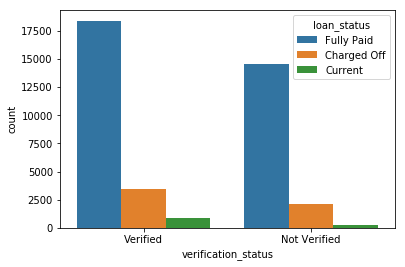

In [12]:
#lets now see the observation on status on the basis on source verification
sns.countplot(x ="verification_status", hue = "loan_status", data = loan)

In [17]:
#ALMOST BOTH THE RECORD ARE SAME , WE CAN SAY THAT BECAUSE WE HAVE LARGE NO OF RECORD FOR
#VERIFIED STATUS AS COMPARED WITH NOT VERIFIED STATUS
x=loan.loc[(loan['verification_status']=="Verified") & (loan['loan_status']=="Charged Off")]
y=loan.loc[(loan['verification_status']=="Not Verified") & (loan['loan_status']=="Charged Off")]
print(len(x))
print(len(y))


3485
2142


In [16]:
#'dividing the loan amount into 4  categories ie "low_loan","moderate_loan" and "high loan"
#' and very_high '
def loanamount(x):
    'divide the loan amount into four categories'
    if x < 6000:
        return "low_loan"
    elif 6000 <= x < 20000:
        return "moderate_loan"
    elif  20000 <=x < 50000:
        return "high loan"
    else:
        return "very_high"

loan['loantype'] = loan.loan_amnt.apply(lambda x: loanamount(x))

In [17]:
#the no of each type of loan application
#NO SALRY WITH VERY HIGH LOAN CATEGORY
loan['loantype'].value_counts()

moderate_loan    22954
low_loan         10525
high loan         6238
Name: loantype, dtype: int64

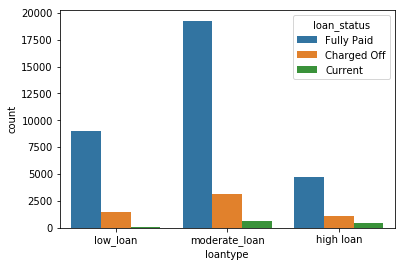

In [18]:
#trying to analyse the effect of loan amount on the loan status
sns.countplot(x = "loantype", hue = "loan_status", data = loan)

In [19]:
#Total no of high loans which were charged off
loan_highamount_chargedoff=loan.loc[(loan['loantype']=="high loan") & (loan['loan_status']=="Charged Off")]

In [20]:
len(loan_highamount_chargedoff.index)

1090

In [21]:
#Total no of moderate loans which were charged off
loan_moderateamount_chargedoff=loan.loc[(loan['loantype']=="moderate_loan") & (loan['loan_status']=="Charged Off")]

In [22]:
#IT IS MAXIMUM
len(loan_moderateamount_chargedoff.index)

3106

In [23]:
#Total no of low loans which were charged off
loan_lowrateamount_chargedoff=loan.loc[(loan['loantype']=="low_loan") & (loan['loan_status']=="Charged Off")]

In [24]:
len(loan_lowrateamount_chargedoff.index)

1431

In [25]:
#effect of loan duration on status
table2 = pd.crosstab(index=loan["term"], 
                          columns=loan["loan_status"])

In [26]:
#IF WE COMPARE THE RATIO OF CHARGED OFF STATUS WITH ALL THE RECORDS OF 36 MONTHS AND 
#RESPECTIVELY SAME FOR THE 60 MONTHS DURATION THEN WE CAN SEE THAT THE BANK IS CHEATED 
#MOSTLY BY THE BORROWERS WHO HAS 60 MONTHS DURATION TO FULLY PAY THE LOAN
table2 

loan_status,Charged Off,Current,Fully Paid
term,,,
36 months,3227,0,25869
60 months,2400,1140,7081


In [27]:
#here grading had been done on the basis of borrower details
table3 = pd.crosstab(index=loan["grade"], 
                          columns=loan["loan_status"])

In [28]:
table3

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,602,40,9443
B,1425,345,10250
C,1347,264,6487
D,1118,222,3967
E,715,179,1948
F,319,73,657
G,101,17,198


In [29]:
#To analyse on the col int_rate we have to convert into float so we have to remove "%"sign

data=loan['int_rate'].str.split("%",n=1,expand=True)
loan['loan_interest']=data[0]
loan.drop(['int_rate'],axis=1,inplace=True)

In [30]:
#converting the col from string to float
loan['loan_interest']=loan['loan_interest'].astype(str).astype(float)


In [31]:
'diving the interest rate into 4 types '
def interest(x):
    if x < 10.0:
        return "low_int"
    elif 10.00 <= x < 15.00:
        return "moderate_int"
    elif 15.00 <= x < 20.00:
        return "high_int"
    else:
        return "veryhigh_int"

loan['interesttype'] = loan.loan_interest.apply(lambda x: interest(x))

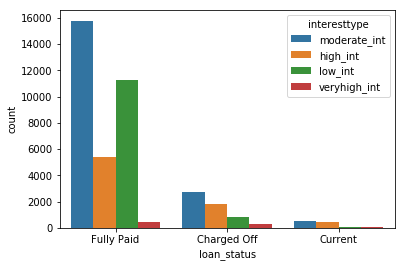

In [32]:
#no of charged off case on the basis on interest type 
sns.countplot(x = "loan_status", hue = "interesttype", data = loan)

In [33]:
#categorizing  the annual income of borrower into low moderate and high  income
def annualincome(x):
    if x < 30000:
        return "low_income"
    elif 30000 <= x < 60000:
        return "moderateincome"
    else:
        return "high_income"
loan["salarytype"]=loan.annual_inc.apply(lambda x:annualincome(x))
        
    

In [34]:
table3 = pd.crosstab(index=loan["salarytype"], 
                          columns=loan["loan_status"])

In [35]:
table3

loan_status,Charged Off,Current,Fully Paid
salarytype,,,
high_income,2403,655,16679
low_income,700,56,3043
moderateincome,2524,429,13228


In [41]:
#previous bankruptcies record can also help in finding out the traitor borrowers
def corru(x):
    if x == 0:
        return "safe"
    else:
        return "not safe"
loan['policeverification']=loan.pub_rec_bankruptcies.apply(lambda x: corru(x))

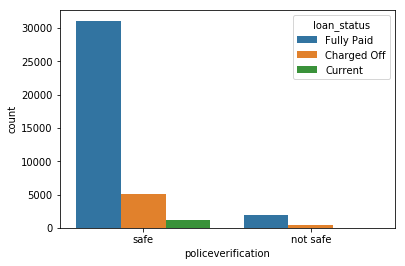

In [42]:
#here safe means people with no bad previous record while not safe means the person with 
#bankrupticies record
sns.countplot(x="policeverification",hue="loan_status",data=loan)

In [43]:
table5=pd.crosstab(index=loan['policeverification'],columns=loan['loan_status'])

In [44]:
#IF RATIO IS CALCULATED THEN MOSTLY PEOPLE IS CHEATING BANK WITH NOT SAFE STATUS
table5

loan_status,Charged Off,Current,Fully Paid
policeverification,,,
not safe,486,39,1853
safe,5141,1101,31097


In [45]:
#SEPERATING THE DATASET WHICH CONSISTS VALUES FOR (LOAN_STATUS==CHARGED OFF)
newloan=loan.loc[loan['loan_status']=='Charged Off']


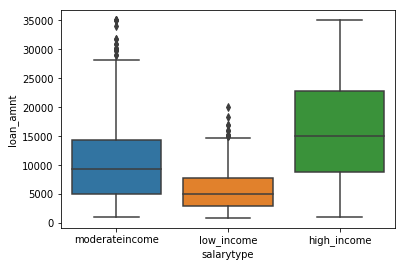

In [46]:
#TRYING TO OBSERVE THE EFFECT OF LOAN_AMNT ON ANNUAL INCOME ,ON WHAT AMOUNT THEY WERE 
#NOT ABLE TO PAY LOAN
#THE BANK HAD TO SUFFER A GREAT LOSS WHEN PEOPLE CHEAT ON HIGH LOAN AMOUNT ie FROM HIGH 
#SALARY PEOPLE 
sns.boxplot(x='salarytype',y='loan_amnt',data =newloan) 

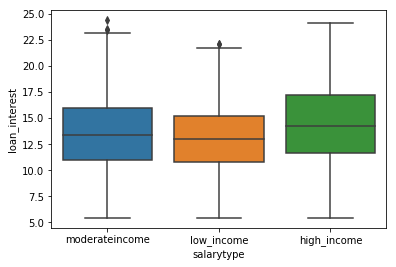

In [47]:
#EFFECT OF LOAN INTEREST,(ON WHAT ANNUAL INCOME AND INTEREST RATE BORROWERS WERE NOT ABLE 
#TO PAY BACK )
#MOST OF THE LOAN WERE NOT PAID ARE FROM MODERATE LOAN_INTEREST
sns.boxplot(x='salarytype',y='loan_interest',data =newloan) 